# NTT - Data challenge Datathon 2023
## Stablishing a purchase plan for 2023
TO do that, we trained a model, a Fully-connected neural network, which predicts the amount of a product for the next year 2023, for a specific hospital and month, but just for the most consumed products.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dataset.xlsx')

df['CLASSIFICATION'] = df['CODIGO'].str[0]
df['CODIGO'] = df['CODIGO'].str[1:]
df['AÑO'] = pd.to_datetime(df['FECHAPEDIDO']).dt.year.astype(int)
df['MES'] = pd.to_datetime(df['FECHAPEDIDO']).dt.month.astype(int)
df['ORIGEN'] = df['ORIGEN'].str.split('-')
df['HOSPITAL'] = df['ORIGEN'].str[1].astype(int)

df.head()

C:\Users\pikur\AppData\Local\Temp\ipykernel_20948\140382660.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AÑO'] = pd.to_datetime(df['FECHAPEDIDO']).dt.year.astype(int)
C:\Users\pikur\AppData\Local\Temp\ipykernel_20948\140382660.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MES'] = pd.to_datetime(df['FECHAPEDIDO']).dt.month.astype(int)


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO,CLASSIFICATION,AÑO,MES,HOSPITAL
0,99808,01/01/23,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,"[1, 2, 60]",TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,E,2023,1,2
1,41691,01/02/16,72714/16,400403,40,10,102.803729,411.214916,Compra menor,"[0, 10, 1]",ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,B,2016,1,10
2,64543,01/02/16,71961/16,403770,20,5,12.100000,48.400000,Compra menor,"[0, 4, 111]",TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,E,2016,1,4
3,65007,01/02/16,72773/16,20415,100,50,215.325000,430.650000,Concurso,"[0, 10, 1]",ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,E,2016,1,10
4,64911,01/02/17,86159/17,20701,300,300,792.000000,792.000000,Concurso,"[0, 6, 1]",ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,E,2017,1,6


In [3]:
products_popularity = df.groupby('CODIGO')['CANTIDADCOMPRA'].mean()
popular_products = products_popularity[products_popularity > products_popularity.quantile(0.8)]
popular_products

CODIGO
56207     413.636364
64750     719.794721
64751    1662.671906
64764    1956.029056
64765     983.862069
64898     572.727273
64911     540.139211
65159    3760.147601
65486     545.040984
66071     435.178174
Name: CANTIDADCOMPRA, dtype: float64

In [4]:
df2 = df[df['CODIGO'].isin(popular_products.index)]
df2.groupby(['CODIGO', 'CANTIDADCOMPRA'])['UNIDADESCONSUMOCONTENIDAS'].unique()

CODIGO  CANTIDADCOMPRA
56207   350                   [350]
        700                   [350]
64750   50                     [50]
        100                    [50]
        200               [50, 200]
                            ...    
66071   2000                   [10]
        3000                   [10]
        3010                   [10]
        3200                   [10]
        3600                  [180]
Name: UNIDADESCONSUMOCONTENIDAS, Length: 217, dtype: object

In [5]:
df2 = df[df['CODIGO'].isin(popular_products.index)]
df2 = df2.drop(columns=['FECHAPEDIDO', 'NUMERO', 'REFERENCIA', 'UNIDADESCONSUMOCONTENIDAS', 
				 'PRECIO', 'IMPORTELINEA', 'ORIGEN', 'PRODUCTO'])
df2.head()
# maybe make column = CANTIDADCOMPRA / UNIDADESCONSUMOCONTENIDAS

,CODIGO,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,MES,HOSPITAL
4,64911,300,Concurso,ALMACENABLE,E,2017,1,6
7,66071,600,Compra menor,ALMACENABLE,E,2017,1,13
10,64898,350,Concurso,TRANSITO,E,2018,1,6
12,66071,120,Compra menor,ALMACENABLE,E,2018,1,0
19,64764,3300,Concurso,ALMACENABLE,E,2021,1,18


In [6]:
df2['AÑO'] = df2['AÑO'] - 2015
df2['MESNEW'] = df2['AÑO'] * 12 + df2['MES']
df2 = df2.drop(columns=['MES'])
df2.head()

,CODIGO,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,HOSPITAL,MESNEW
4,64911,300,Concurso,ALMACENABLE,E,2,6,25
7,66071,600,Compra menor,ALMACENABLE,E,2,13,25
10,64898,350,Concurso,TRANSITO,E,3,6,37
12,66071,120,Compra menor,ALMACENABLE,E,3,0,37
19,64764,3300,Concurso,ALMACENABLE,E,6,18,73


In [7]:
df2['TIPOCOMPRA'] = df2['TIPOCOMPRA'] == 'Concurso'
df2['TGL'] = df2['TGL'] == 'ALMACENABLE'
df2.head()

,CODIGO,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,HOSPITAL,MESNEW
4,64911,300,True,True,E,2,6,25
7,66071,600,False,True,E,2,13,25
10,64898,350,True,False,E,3,6,37
12,66071,120,False,True,E,3,0,37
19,64764,3300,True,True,E,6,18,73


In [8]:
len(df2['CLASSIFICATION'].unique())

2

In [9]:
df2['CLASSIFICATION'] = df2['CLASSIFICATION'] == 'E'
df2.head()

,CODIGO,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,HOSPITAL,MESNEW
4,64911,300,True,True,True,2,6,25
7,66071,600,False,True,True,2,13,25
10,64898,350,True,False,True,3,6,37
12,66071,120,False,True,True,3,0,37
19,64764,3300,True,True,True,6,18,73


In [10]:
len(df2['HOSPITAL'].unique())

10

In [11]:
df2 = pd.get_dummies(df2, columns=['CODIGO', 'HOSPITAL'])
df2.head()

,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,MESNEW,CODIGO_56207,CODIGO_64750,CODIGO_64751,CODIGO_64764,...,HOSPITAL_0,HOSPITAL_4,HOSPITAL_6,HOSPITAL_7,HOSPITAL_8,HOSPITAL_10,HOSPITAL_11,HOSPITAL_12,HOSPITAL_13,HOSPITAL_18
4,300,True,True,True,2,25,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,600,False,True,True,2,25,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,350,True,False,True,3,37,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
12,120,False,True,True,3,37,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
19,3300,True,True,True,6,73,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [12]:
scaler = StandardScaler()
df2['CANTIDADCOMPRA'] = scaler.fit_transform(df2[['CANTIDADCOMPRA']])
df2['MESNEW'] = scaler.fit_transform(df2[['MESNEW']])
df2.head()

,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,MESNEW,CODIGO_56207,CODIGO_64750,CODIGO_64751,CODIGO_64764,...,HOSPITAL_0,HOSPITAL_4,HOSPITAL_6,HOSPITAL_7,HOSPITAL_8,HOSPITAL_10,HOSPITAL_11,HOSPITAL_12,HOSPITAL_13,HOSPITAL_18
4,-0.653464,True,True,True,2,-1.005219,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,-0.419578,False,True,True,2,-1.005219,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,-0.614483,True,False,True,3,-0.606682,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
12,-0.793795,False,True,True,3,-0.606682,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
19,1.685393,True,True,True,6,0.588930,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df_train = df2[df2['AÑO'] < 8] # 8 is 2023
df_test = df2[df2['AÑO'] == 8]
df_train = df_train.drop(columns=['AÑO'])
df_test = df_test.drop(columns=['AÑO'])
df_train.shape, df_test.shape

((3203, 25), (348, 25))

In [14]:
df_train = df_train.sort_values(by='MESNEW')
df_train.head(12)

,CANTIDADCOMPRA,TIPOCOMPRA,TGL,CLASSIFICATION,MESNEW,CODIGO_56207,CODIGO_64750,CODIGO_64751,CODIGO_64764,CODIGO_64765,...,HOSPITAL_0,HOSPITAL_4,HOSPITAL_6,HOSPITAL_7,HOSPITAL_8,HOSPITAL_10,HOSPITAL_11,HOSPITAL_12,HOSPITAL_13,HOSPITAL_18
13392,-0.419578,False,True,True,-1.802294,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
178,-0.653464,True,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
179,-0.653464,True,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9725,2.231126,False,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
182,-0.770407,False,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12882,-0.731426,False,True,True,-1.802294,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
119,0.671888,False,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
117,-0.419578,True,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
116,3.104299,False,True,True,-1.802294,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
12881,-0.762610,False,True,True,-1.802294,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
df_train = df_train.drop(df_train.index[-1])
features = df_train.drop('CANTIDADCOMPRA', axis=1)
target = df_train['CANTIDADCOMPRA']
target.head()

13392   -0.419578
178     -0.653464
179     -0.653464
9725     2.231126
182     -0.770407
Name: CANTIDADCOMPRA, dtype: float64

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.96)
features = pca.fit_transform(features)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.737279,-0.136819,0.218014,0.209232,0.538275,-0.438924,-0.255856,-0.319061,0.552634,0.009492,0.652188,0.262893,0.440042,-0.031585
1,1.326153,0.353017,-1.131887,0.708538,0.006689,-0.068195,0.490962,-0.277663,0.187460,-0.359720,-0.176675,-0.294162,0.003021,-0.276387
2,1.412047,-0.789269,-0.679419,0.734470,-0.350762,-0.427207,0.342549,-0.401291,-0.050702,-0.455938,-0.252722,-0.296299,-0.265156,-0.070892
3,1.645643,0.591037,-0.571221,-0.325520,-0.292452,-0.066593,0.009964,0.049182,0.310048,0.511833,0.130525,-0.148265,-0.261803,-0.538896
4,1.556697,1.103218,-0.099328,0.102229,-0.272932,-0.321521,-0.184560,-0.016370,-0.224683,-0.240780,-0.050454,-0.180428,0.010774,-0.047335


In [17]:
model = tf.keras.Sequential([
	tf.keras.layers.Dense(32, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Dense(128, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(256, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(64, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Dense(1, 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
])

# Compile the model
def rmse(y_true, y_pred):
	return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse, 'mae'])

In [18]:
model = tf.keras.Sequential([
	tf.keras.layers.Dense(32, 'relu'),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Dense(128, 'relu'),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(256, 'relu'),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(64, 'relu'),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Dense(1, 'tanh'),
])

# Compile the model
def rmse(y_true, y_pred):
	return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [19]:
history = model.fit(features, target, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
81/81 [==============================] - 2s 7ms/step - loss: 0.7943 - mae: 0.5509 - val_loss: 0.7749 - val_mae: 0.4976
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 0.5504 - mae: 0.4390 - val_loss: 0.6354 - val_mae: 0.4695
Epoch 3/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4623 - mae: 0.3851 - val_loss: 0.6201 - val_mae: 0.4631
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4378 - mae: 0.3633 - val_loss: 0.6022 - val_mae: 0.4608
Epoch 5/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4222 - mae: 0.3507 - val_loss: 0.5999 - val_mae: 0.4559
Epoch 6/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4144 - mae: 0.3415 - val_loss: 0.5999 - val_mae: 0.4515
Epoch 7/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4091 - mae: 0.3376 - val_loss: 0.5985 - val_mae: 0.4440
Epoch 8/50
81/81 [==============================] - 0s 5ms/step - loss: 0.4103 - mae: 0.33

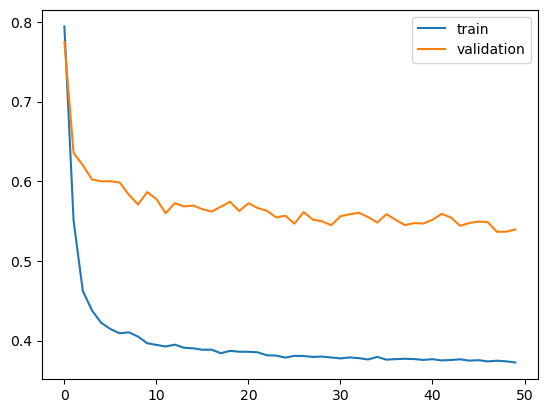

In [20]:
# plot the loss (training and validation)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [21]:
df_test = df_test.sort_values(by='MESNEW')
test_features = df_test.drop('CANTIDADCOMPRA', axis=1)
test_target = df_test['CANTIDADCOMPRA']

test_features = pca.transform(test_features)

In [22]:
predictions = model.predict(test_features)
compare = np.hstack((predictions, test_target.to_numpy().reshape(-1, 1)))
compare

11/11 [==============================] - 0s 3ms/step


array([[-5.83655536e-01, -3.65004775e-01],
       [-5.83655536e-01, -4.74151416e-01],
       [ 1.00824535e-02,  4.22410279e-01],
       [-3.42395343e-02, -4.97539982e-01],
       [-3.34661275e-01, -4.19578095e-01],
       [-3.26744586e-01, -6.53463755e-01],
       [ 9.99906480e-01,  4.56998264e+00],
       [-4.48508412e-01, -7.47018018e-01],
       [-3.42395343e-02, -4.97539982e-01],
       [-5.83655536e-01, -4.97539982e-01],
       [-5.83655536e-01, -2.48061945e-01],
       [-3.50512207e-01, -1.07730549e-01],
       [-5.83655536e-01, -4.74151416e-01],
       [-2.25406036e-01, -8.09387527e-01],
       [ 5.51337540e-01,  4.38002656e-01],
       [ 3.39678168e-01,  2.10638703e+00],
       [-3.25271070e-01, -6.53463755e-01],
       [-3.42395343e-02, -1.07730549e-01],
       [-2.38915190e-01, -4.19578095e-01],
       [-1.98487058e-01, -3.88393341e-01],
       [-5.65930545e-01, -7.31425641e-01],
       [-1.98487058e-01, -3.88393341e-01],
       [ 6.38414145e-01,  6.71888315e-01],
       [-1.

In [126]:
model.evaluate(test_features, test_target)

11/11 [==============================] - 0s 3ms/step - loss: 0.7881 - mae: 0.4998


[0.7880731225013733, 0.4998283386230469]

The resulting output is a result of latent features, as we first standarized the values and then transformed with PCA, so it's not yet transformed back to the original scale, so it's a bit harder to interpret.

## Purchase patterns
To detect the frequency of a particular observation within purchase patterns, we meticulously analyzed the dataset. By scrutinizing the intricate web of purchasing behaviors, we were able to identify the recurrence and frequency of specific observations.

In [24]:
import datetime

def transform_day_of_the_year(date_str):
	date_obj = datetime.datetime.strptime(date_str, '%d/%m/%y')
	day_of_year = date_obj.timetuple().tm_yday - 1
	return day_of_year

def data_preprocessing():
	# Load the dataset
	df = pd.read_excel('dataset.xlsx')

	# Data cleaning and preprocessing
	df['NUMERO'] = df['NUMERO'].str.split('/')
	df['NUMERO'] = df['NUMERO'].str[0]
	df['CLASSIFICATION'] = df['CODIGO'].str[0]
	df['CODIGO'] = df['CODIGO'].str[1:]
	df['CODIGO'] = df['CODIGO'].astype(str)

	df['AÑO'] = pd.to_datetime(df['FECHAPEDIDO']).dt.year.astype(str)
	df['MES'] = pd.to_datetime(df['FECHAPEDIDO']).dt.strftime('%Y-%m')

	df['FECHAPEDIDO'] = df['FECHAPEDIDO'].apply(transform_day_of_the_year)
	df = df.sort_values(by='FECHAPEDIDO')

	df['ORIGEN'] = df['ORIGEN'].str.split('-')
	df['REGION'] = df['ORIGEN'].str[0]
	df['HOSPITAL'] = df['ORIGEN'].str[1].astype(str)
	df['DEPARTMENT'] = df['ORIGEN'].str[2]

	# We drop the column region because of redundancy
	df.drop('REGION', axis=1, inplace=True)

	# If True TRANSITO, if False ALMACENABLE
	df['TGL'] = df['TGL'] == 'TRANSITO'

	# If True Concurso, if False Compra menor
	df['TIPOCOMPRA'] = df['TIPOCOMPRA'] == 'Concurso'


	# Drop all missing values from the dataset
	df.dropna(inplace=True)

	# Drop all the columns that are not needed
	df.drop(columns=['PRODUCTO', 'IMPORTELINEA', 'REFERENCIA', 'ORIGEN', 'UNIDADESCONSUMOCONTENIDAS'], inplace=True)

	return df

df = data_preprocessing()

C:\Users\pikur\AppData\Local\Temp\ipykernel_20948\1178729936.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AÑO'] = pd.to_datetime(df['FECHAPEDIDO']).dt.year.astype(str)
C:\Users\pikur\AppData\Local\Temp\ipykernel_20948\1178729936.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MES'] = pd.to_datetime(df['FECHAPEDIDO']).dt.strftime('%Y-%m')


     CANTIDADCOMPRA CODIGO HOSPITAL CLASSIFICATION  Frequency
181              12  78950       12              E        340
389              50  64543       18              E        161
648             100  65007       10              E        157
114              10  40558       18              B        129
184              12  78950       18              E        110
674             100  99807        0              E        103
947             200  64663        0              E        103
983             200  66071        0              E        100
623             100  41691        0              B         95
7                 2  40558       11              B         94


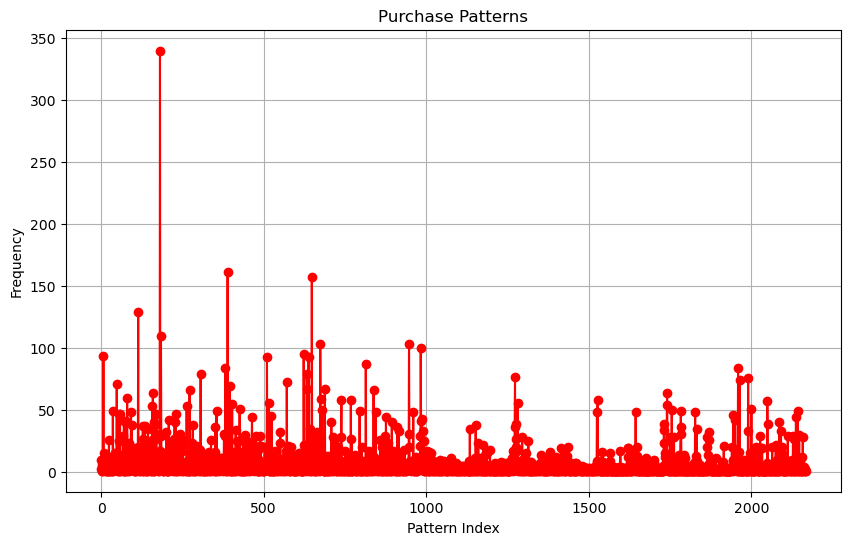

In [25]:
# Group by relevant columns and aggregate to find purchase patterns
purchase_patterns = df.groupby(['CANTIDADCOMPRA', 'CODIGO', 'HOSPITAL', 'CLASSIFICATION']).size().reset_index(name='Frequency')

# Display the top purchase patterns
top_purchase_patterns = purchase_patterns.sort_values(by='Frequency', ascending=False).head(10)
print(top_purchase_patterns)

# Plotting a line chart
plt.figure(figsize=(10, 6))
plt.plot(purchase_patterns['Frequency'], marker='o', linestyle='-', color='r')
plt.title('Purchase Patterns')
plt.xlabel('Pattern Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

CANTIDADCOMPRA
1200    2
1600    1
1800    1
2000    4
Name: count, dtype: int64
The number of products bought by the hospital at year 2023 of that specific product:  13800


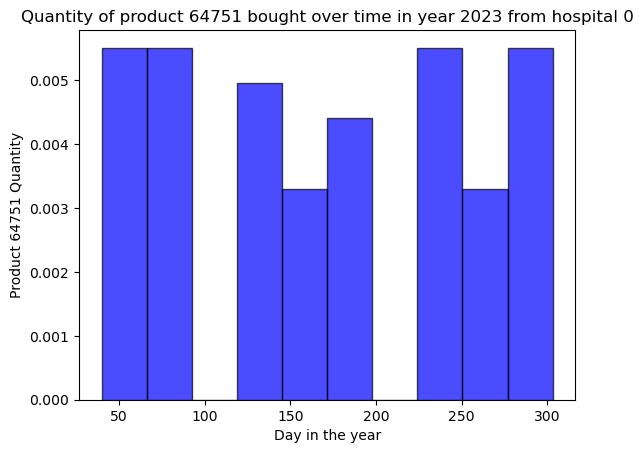

,CODIGO,FECHAPEDIDO,NUMERO,CANTIDADCOMPRA,PRECIO,TIPOCOMPRA,TGL,CLASSIFICATION,AÑO,MES,HOSPITAL,DEPARTMENT
4595,64751,40,166260,2000,198.000012,True,False,E,2023,2023-10,0,2
12030,64751,82,382996,2000,198.000012,True,False,E,2023,2023-03,0,2
5253,64751,130,587017,1800,9.900001,True,False,E,2023,2023-11,0,2
7965,64751,166,748978,1200,9.900001,True,False,E,2023,2023-06,0,2
15098,64751,180,813387,1600,52.800000,False,False,E,2023,2023-06,0,2
10602,64751,232,1003095,2000,198.000012,True,False,E,2023,2023-08,0,2
12758,64751,267,1182293,1200,9.900001,True,False,E,2023,2023-09,0,2
15679,64751,303,1336697,2000,198.000012,True,False,E,2023,2023-10,0,2


In [26]:
def product_quantity_evolution_over_year_in_hospital(c, product_code, hospital_code, year):
	c = df[(df['HOSPITAL'] == hospital_code) & (df['CODIGO'] == product_code) & (df['AÑO'] == year)]
	product_frequencies = c['CANTIDADCOMPRA'].value_counts().sort_index()
	sum_of_products = (c['CANTIDADCOMPRA'].value_counts() * c['CANTIDADCOMPRA'].value_counts().index).sum()
	print(product_frequencies)
	print("The number of products bought by the hospital at year 2023 of that specific product: ", sum_of_products)
	#selected_data = c[c['PRODUCTO'].isin(['64751','41691'])]

	# Create a histogram
	plt.hist(c['FECHAPEDIDO'], weights=c['CANTIDADCOMPRA'], bins=10, density=True, alpha=0.7, color='blue', edgecolor='black')

	# Add labels and title
	plt.xlabel('Day in the year')
	plt.ylabel(f'Product {product_code} Quantity')
	plt.title(f'Quantity of product {product_code} bought over time in year {year} from hospital {hospital_code}')

	# Display the histogram
	plt.show()
	return c

product_quantity_evolution_over_year_in_hospital(df, '64751', '0', '2023')

## More analysis on the dataset relations

In [1]:
import numpy as np 
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel("dataset.xlsx")

In [4]:
df = df[['CODIGO' ,'FECHAPEDIDO', 'CANTIDADCOMPRA', 'ORIGEN']] #codigo, fechapedido, cantidad comprar
df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'])  # Convert to datetime if it's not already
# Sort the DataFrame by the 'date' column in ascending order
df = df.sort_values(by='FECHAPEDIDO')
df['ORIGEN'] = df['ORIGEN'].str.split('-').str.get(1) #get hosiptal number for indentify each hospital
df.head()

,CODIGO,FECHAPEDIDO,CANTIDADCOMPRA,ORIGEN
90,E65485,2015-01-04,320,10
91,E65159,2015-01-04,2000,10
118,E64983,2015-01-06,350,13
119,E65159,2015-01-06,2000,10
113,B41691,2015-01-06,30,6


In [5]:
#Here we try to do see data of one hospital. we get data of hospital 0
df = df[df['ORIGEN'] == '0']
df

,CODIGO,FECHAPEDIDO,CANTIDADCOMPRA,ORIGEN
286,E64940,2015-01-09,210,0
330,E64663,2015-01-10,200,0
9279,E64663,2015-01-19,150,0
11328,E66071,2015-01-23,100,0
11327,E65056,2015-01-23,1002,0
...,...,...,...,...
5838,E64764,2023-12-06,1280,0
5835,E64488,2023-12-06,60,0
5836,E64544,2023-12-06,120,0
5834,B41691,2023-12-06,100,0


In [6]:
len(df)

2268

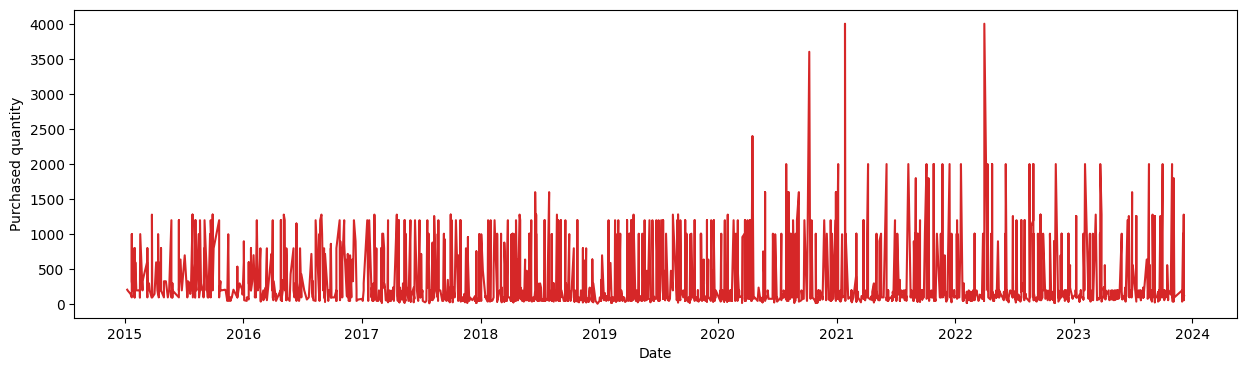

In [7]:
#here we plot data
#We will see how many we have purchased every year 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Purchased quantity', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

    
plot_df(df, x=df['FECHAPEDIDO'], y=df['CANTIDADCOMPRA']) #get FECHAPEDIDO and CANTIDADCOMPRA column

In [8]:
#column CODIGO has format E64940. Here letter classify each code class.
df['CLASSIFICATION'] = df['CODIGO'].str[0] #So we make another column that classify each row depend on its product class
df.head()

,CODIGO,FECHAPEDIDO,CANTIDADCOMPRA,ORIGEN,CLASSIFICATION
286,E64940,2015-01-09,210,0,E
330,E64663,2015-01-10,200,0,E
9279,E64663,2015-01-19,150,0,E
11328,E66071,2015-01-23,100,0,E
11327,E65056,2015-01-23,1002,0,E


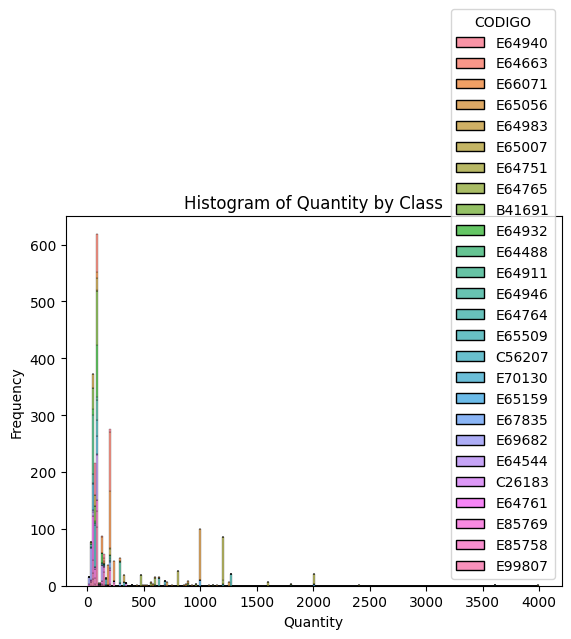

In [9]:
# Create a new DataFrame with only two columns
new_df = df[['CODIGO', 'CANTIDADCOMPRA']]

#Here we try to visualize how much each product we have purchased of all class
sns.histplot(data=new_df, x='CANTIDADCOMPRA', hue='CODIGO', multiple='stack', bins='auto', edgecolor='black')
plt.title('Histogram of Quantity by Class')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

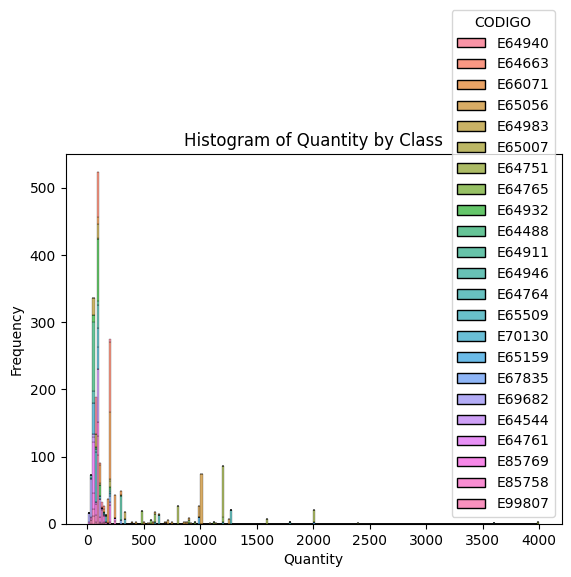

In [10]:
condition_value = 'E'  # Class we want to visualize

new_df = df[df['CLASSIFICATION'] == 'E'][['CODIGO', 'CANTIDADCOMPRA']] #slect rows where classfication has E class


#Here we try to visualize how much each product we have purchased of class E
sns.histplot(data=new_df, x='CANTIDADCOMPRA', hue='CODIGO', multiple='stack', bins='auto', edgecolor='black')

plt.title('Histogram of Quantity by Class')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

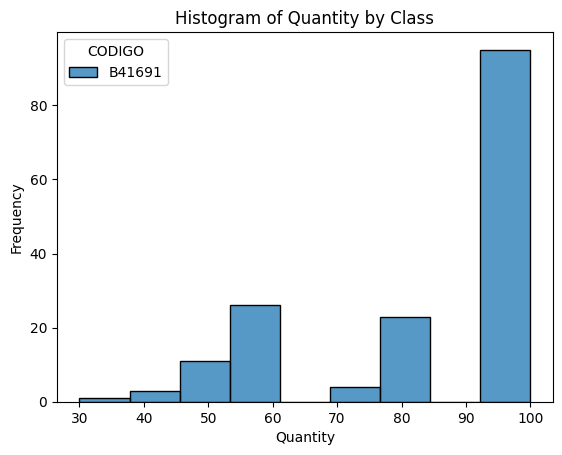

In [11]:
condition_value = 'B'  # Class we want to visualize

new_df = df[df['CLASSIFICATION'] == 'B'][['CODIGO', 'CANTIDADCOMPRA']] #slect rows where classfication has B class

#Here we try to visualize how much each product we have purchased of class B
sns.histplot(data=new_df, x='CANTIDADCOMPRA', hue='CODIGO', multiple='stack', bins='auto', edgecolor='black')

plt.title('Histogram of Quantity by Class')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

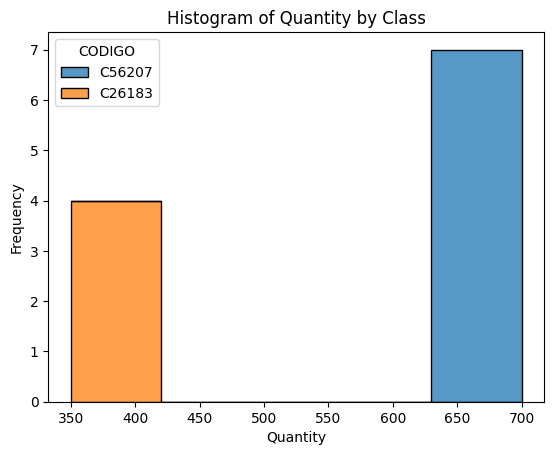

In [12]:
condition_value = 'C'  # Class we want to visualize

new_df = df[df['CLASSIFICATION'] == 'C'][['CODIGO', 'CANTIDADCOMPRA']] #slect rows where classfication has C class

#Here we try to visualize how much each product we have purchased of class B
sns.histplot(data=new_df, x='CANTIDADCOMPRA', hue='CODIGO', multiple='stack', bins='auto', edgecolor='black')

plt.title('Histogram of Quantity by Class')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

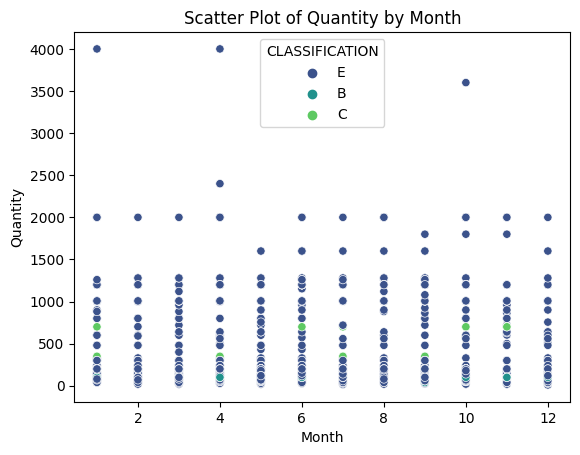

In [13]:
#Here we try to see things what happend every month of every year
df['month'] = pd.to_datetime(df['FECHAPEDIDO']).dt.month #make column that indicate month

new_df = df[['month', 'CANTIDADCOMPRA','CLASSIFICATION']]#create new dataframe with our interested variables
new_df.head()
#Do scatter plot to see how much we have purchased each class each month of every year
sns.scatterplot(data=new_df, x='month', y='CANTIDADCOMPRA', hue='CLASSIFICATION', palette='viridis')

plt.title('Scatter Plot of Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

In [15]:
# Read the Excel file into a DataFrame
df = pd.read_excel("dataset.xlsx")
df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'])  # Convert to datetime if it's not already
# Sort the DataFrame by the 'date' column in ascending order
df = df.sort_values(by='FECHAPEDIDO')
df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
90,E65485,2015-01-04,286977/15,31150,320,5,8.250039,528.002496,Compra menor,0-10-1,ALMACENABLE,APOSITO DE HIDROCOLOIDE-3
91,E65159,2015-01-04,287119/15,281 421,2000,1000,10.461204,20.922408,Compra menor,0-10-1,ALMACENABLE,APOSITO PARA PEQUEÑAS HERIDAS REDONDO-19
118,E64983,2015-01-06,442238/15,157027.7,350,10,17.270000,604.450000,Compra menor,0-13-1,ALMACENABLE,APOSITO MALLADO C/ PARAFINA-38
119,E65159,2015-01-06,442230/15,281 421,2000,1000,10.461204,20.922408,Compra menor,0-10-1,ALMACENABLE,APOSITO PARA PEQUEÑAS HERIDAS REDONDO-19
113,B41691,2015-01-06,442124/15,400403,30,10,102.803729,308.411187,Compra menor,0-6-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...


In [16]:
#Here we do hot encoding of TIPOCOMPRA, TGL varibales because these are categorical variables
df_encoded = df[['TIPOCOMPRA' ,'TGL']] 
# Use the get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['TIPOCOMPRA', 'TGL'])
df_encoded.head()

,TIPOCOMPRA_Compra menor,TIPOCOMPRA_Concurso,TGL_ALMACENABLE,TGL_TRANSITO
90,1,0,1,0
91,1,0,1,0
118,1,0,1,0
119,1,0,1,0
113,1,0,1,0


In [17]:
#We see if there exist some realtionship between these variables
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                         TIPOCOMPRA_Compra menor  TIPOCOMPRA_Concurso  \
TIPOCOMPRA_Compra menor                 1.000000            -1.000000   
TIPOCOMPRA_Concurso                    -1.000000             1.000000   
TGL_ALMACENABLE                        -0.352892             0.352892   
TGL_TRANSITO                            0.344051            -0.344051   

                         TGL_ALMACENABLE  TGL_TRANSITO  
TIPOCOMPRA_Compra menor        -0.352892      0.344051  
TIPOCOMPRA_Concurso             0.352892     -0.344051  
TGL_ALMACENABLE                 1.000000     -0.983106  
TGL_TRANSITO                   -0.983106      1.000000  


In [18]:
#We join these variables into our dataframe
df = pd.concat([df, df_encoded], axis=1)
df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO,TIPOCOMPRA_Compra menor,TIPOCOMPRA_Concurso,TGL_ALMACENABLE,TGL_TRANSITO
90,E65485,2015-01-04,286977/15,31150,320,5,8.250039,528.002496,Compra menor,0-10-1,ALMACENABLE,APOSITO DE HIDROCOLOIDE-3,1,0,1,0
91,E65159,2015-01-04,287119/15,281 421,2000,1000,10.461204,20.922408,Compra menor,0-10-1,ALMACENABLE,APOSITO PARA PEQUEÑAS HERIDAS REDONDO-19,1,0,1,0
118,E64983,2015-01-06,442238/15,157027.7,350,10,17.270000,604.450000,Compra menor,0-13-1,ALMACENABLE,APOSITO MALLADO C/ PARAFINA-38,1,0,1,0
119,E65159,2015-01-06,442230/15,281 421,2000,1000,10.461204,20.922408,Compra menor,0-10-1,ALMACENABLE,APOSITO PARA PEQUEÑAS HERIDAS REDONDO-19,1,0,1,0
113,B41691,2015-01-06,442124/15,400403,30,10,102.803729,308.411187,Compra menor,0-6-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,1,0,1,0


In [20]:
#here we see if there exist realtionship between TIPOCOMPRA and IMPORTELINEA
correlation1 = df['TIPOCOMPRA_Compra menor'].corr(df['IMPORTELINEA'])
correlation2 = df['TIPOCOMPRA_Concurso'].corr(df['IMPORTELINEA'])

print(f"Correlation with Encoded Variable 1: {correlation1}")
print(f"Correlation with Encoded Variable 2: {correlation2}")

Correlation with Encoded Variable 1: -0.13082687835872434
Correlation with Encoded Variable 2: 0.1308268783587243


In [21]:
#here we see if there exist realtionship between TGL_ALMACENABLE and IMPORTELINEA
correlation1 = df['TGL_ALMACENABLE'].corr(df['IMPORTELINEA'])
correlation2 = df['TGL_TRANSITO'].corr(df['IMPORTELINEA'])

print(f"Correlation with Encoded Variable 1: {correlation1}")
print(f"Correlation with Encoded Variable 2: {correlation2}")

Correlation with Encoded Variable 1: 0.17331817671514183
Correlation with Encoded Variable 2: -0.16719974828542666


C:\Users\pikur\AppData\Local\Temp\ipykernel_3208\1189691011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transp['month'] = pd.to_datetime(df_transp['FECHAPEDIDO']).dt.month #get month
C:\Users\pikur\AppData\Local\Temp\ipykernel_3208\1189691011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transp.drop('FECHAPEDIDO', axis=1, inplace=True) #remove FECHAPEDIDO because we don't need it


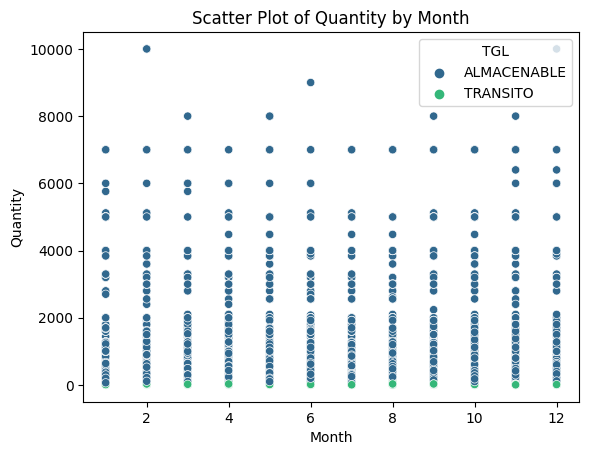

In [22]:
#Here we try to visaulize how they buyed products in terms of months. Means if it is ALMACENABLE or TRANSITO
df_transp = df[['CANTIDADCOMPRA' ,'FECHAPEDIDO', 'TGL']] #We get our intersiting variables
df_transp['month'] = pd.to_datetime(df_transp['FECHAPEDIDO']).dt.month #get month 
df_transp.drop('FECHAPEDIDO', axis=1, inplace=True) #remove FECHAPEDIDO because we don't need it

#We do scatter plot for better understanding
sns.scatterplot(data=df_transp, x='month', y='CANTIDADCOMPRA', hue='TGL', palette='viridis')

plt.title('Scatter Plot of Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()



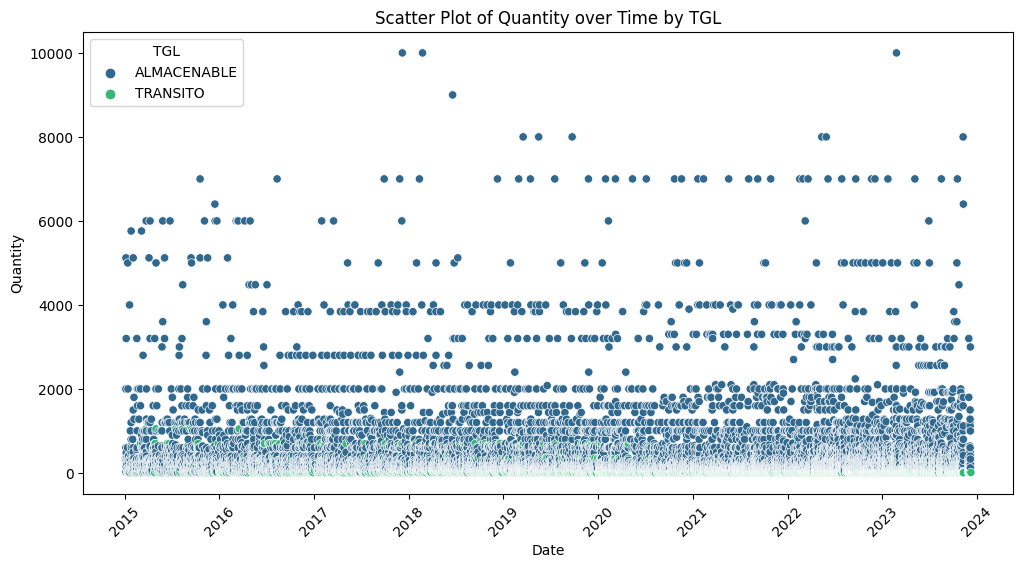

In [23]:
#Here we try to visaulize how they buyed products in terms of year. Means if it is ALMACENABLE or TRANSITO
df_transp = df[['CANTIDADCOMPRA', 'FECHAPEDIDO', 'TGL']] #We get our intersiting variables


#We do scatter plot for better understanding
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FECHAPEDIDO', y='CANTIDADCOMPRA', hue='TGL', data=df, palette='viridis')
plt.title('Scatter Plot of Quantity over Time by TGL')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


C:\Users\pikur\AppData\Local\Temp\ipykernel_3208\2749703976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transp['month'] = pd.to_datetime(df_transp['FECHAPEDIDO']).dt.month #we get month
C:\Users\pikur\AppData\Local\Temp\ipykernel_3208\2749703976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transp.drop('FECHAPEDIDO', axis=1, inplace=True) #Drop FECHAPEDIDO column


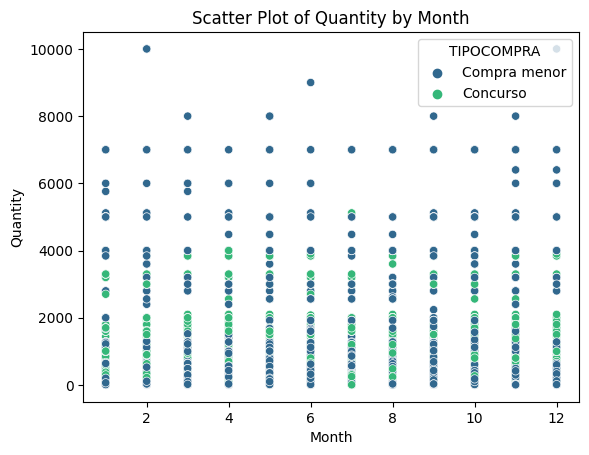

In [24]:
#Here we try to visaulize how they buyed products in terms of months. Means if it is compra menor or concurso
df_transp = df[['CANTIDADCOMPRA' ,'FECHAPEDIDO', 'TIPOCOMPRA']]
df_transp['month'] = pd.to_datetime(df_transp['FECHAPEDIDO']).dt.month #we get month
df_transp.drop('FECHAPEDIDO', axis=1, inplace=True) #Drop FECHAPEDIDO column

#Do plot 
sns.scatterplot(data=df_transp, x='month', y='CANTIDADCOMPRA', hue='TIPOCOMPRA', palette='viridis')

plt.title('Scatter Plot of Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


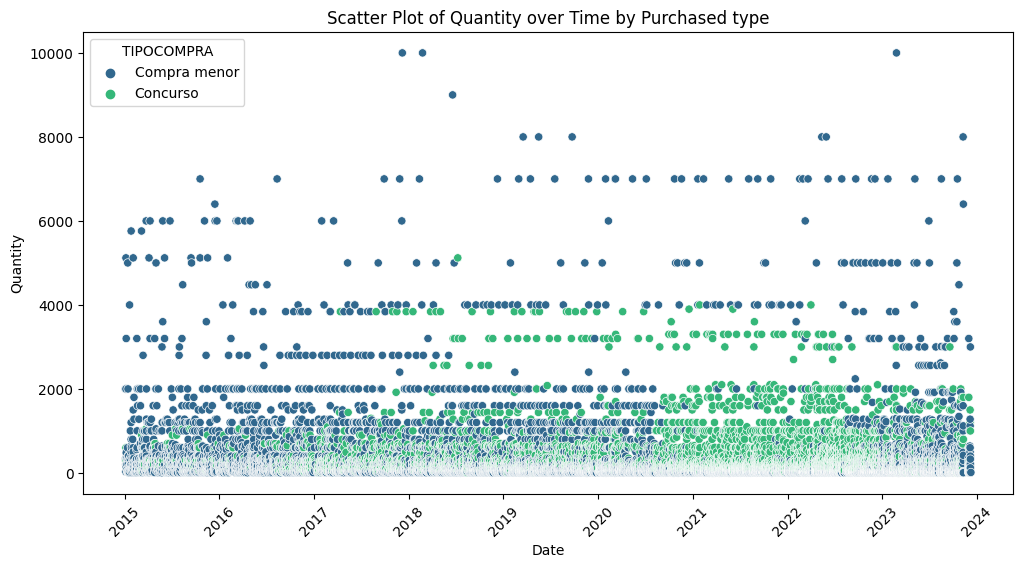

In [25]:
#Here we try to visaulize how they buyed products in terms of years. Means if it is compra menor or concurso
df_transp = df[['CANTIDADCOMPRA', 'FECHAPEDIDO', 'TIPOCOMPRA']]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FECHAPEDIDO', y='CANTIDADCOMPRA', hue='TIPOCOMPRA', data=df, palette='viridis')
plt.title('Scatter Plot of Quantity over Time by Purchased type')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()
